In [ ]:
!pip install -q -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import NearestNeighbors
import pandas as pd

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pred_1 = np.load('/content/drive/My Drive/capstone_annie/pred_sen_10_27_150.npy')
pred_2 = np.load('/content/drive/My Drive/capstone_annie/pred_sen_10_27_300.npy')
pred_3 = np.load('/content/drive/My Drive/capstone_annie/pred_sen_10_27_450.npy')
pred_4 = np.load('/content/drive/My Drive/capstone_annie/pred_sen_10_27_500.npy')

pred_all = np.vstack((pred_1, pred_2, pred_3, pred_4))

In [ ]:
target_class_1 = np.load('/content/drive/MyDrive/capstone_annie/true_10_10_100.npy')
target_class_2 = np.load('/content/drive/MyDrive/capstone_annie/true_10_10_200.npy')
target_class_3 = np.load('/content/drive/MyDrive/capstone_annie/true_10_10_300.npy')
target_class_4 = np.load('/content/drive/MyDrive/capstone_annie/true_10_10_400.npy')

target_class_all = np.vstack((target_class_1, target_class_2, target_class_3, target_class_4))

In [ ]:
target_class_all = target_class_all[:, 0]

## Mapping LLAVA output to Classes with KNN

In [ ]:
embeddings_cluster_dict = {"aluminum food can":1,
              "tin can":1,
              "steel can":1,
              "canned food container":1,
              "canned food can":1,
              "soda can":2,
              "beverage can":2,
              "soft drink can":2,
              "pepsi can":2,
              "coca cola can":2,
              "paper cup":3,
              "hot beverage cup":3,
              "coffee cup":3,
              "lined paper cup":3,
              "disposable coffee cup":3,
              "white paper cup":3,
              "cardboard":4,
             "cardboard box":4,
              "box":4,
              "packing box":4,
              "cereal box":4,
              "glass bottle":5,
              "glass drink container":5,
              "alcohol bottle":5,
              "beer bottle":5,
              "water bottle":6,
              "disposable water bottle":6,
              "plastic bottle":6,
              "plastic soda bottle":6}

In [ ]:
reference_words_list = list(embeddings_cluster_dict.keys())

In [ ]:
encoder_model = SentenceTransformer('sentence-transformers/LaBSE')

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [ ]:
reference_embeddings = encoder_model.encode(reference_words_list)

In [ ]:
knn_model = NearestNeighbors(n_neighbors=5)
knn_model.fit(reference_embeddings)

NearestNeighbors()

In [ ]:
encoder_model.encode(pred_all[0])

array([[-1.49246538e-02,  3.90993580e-02,  3.06732208e-03,
         3.17508429e-02,  3.07186460e-03,  7.73939537e-03,
         9.08180419e-03, -2.38144267e-02, -5.16269356e-02,
        -3.27252634e-02,  2.68525491e-03, -1.61113627e-02,
        -1.30774537e-02, -2.27364935e-02,  5.46867810e-02,
        -6.68891966e-02, -2.26584785e-02,  1.40303439e-02,
         4.32601990e-03, -4.48437110e-02,  3.78835276e-02,
         8.02144315e-03, -2.41068583e-02,  4.91298772e-02,
         2.13758685e-02, -3.00077372e-04,  4.43978384e-02,
        -5.22378609e-02, -1.74702462e-02, -4.17217277e-02,
         8.79603671e-04, -3.32780182e-03,  9.53019888e-04,
        -1.20004890e-02,  1.70049388e-02,  2.37985961e-02,
        -1.03340615e-02, -7.07298368e-02,  2.38899384e-02,
         4.71941978e-02, -2.32602796e-03, -1.75395049e-02,
         2.17050351e-02, -4.26251069e-02, -3.57065238e-02,
         2.15597507e-02,  2.01731753e-02,  4.49779555e-02,
        -6.44622371e-02, -2.14652978e-02,  1.13022700e-0

In [ ]:
distances, indices = knn_model.kneighbors(encoder_model.encode(pred_all[0]))
print(distances[0], indices[0])

[0.68059754 0.87674457 0.98319447 1.07958305 1.08072603] [ 0  2  1 23 27]


In [ ]:
llava_output_df = pd.DataFrame(columns=['output', 'neighbor', 'distance', 'final_selected_class'])


for i in range(len(pred_all)):
  final_selected_class = ''

  output = pred_all[i]
  query_llava = encoder_model.encode(output)

  dists, idxs = knn_model.kneighbors(query_llava)
  dists = dists[0]
  idxs = idxs[0]
  for l in range(len(dists)):
    neighbor = reference_words_list[idxs[l]]
    distance = dists[l]

    if l == 0:
      nearest_neigh_dist = dists[l]
      if nearest_neigh_dist <0.9:
        final_selected_class = embeddings_cluster_dict[neighbor]
      else:
        final_selected_class = 'Non described item'

    llava_output_df.loc[len(llava_output_df)] = [output, neighbor, distance, final_selected_class]





In [ ]:
palm_desert_instruc = {'paper': "palm desert instructions relevant to paper",
                       'metal stuff': "....",
                       'other stuff': "This item is not on the acceptable list of items, please throw out"}

In [ ]:
llava_output_df.to_csv('/content/drive/My Drive/capstone_annie/knn_results.csv')

In [ ]:
llava_output_df = pd.read_csv('/content/drive/My Drive/capstone_annie/knn_results.csv')

In [ ]:
llava_output_df

,Unnamed: 0,output,neighbor,distance,final_selected_class,id
0,0,['Aluminum can'],aluminum food can,0.680598,1,0
1,1,['Aluminum can'],steel can,0.876745,1,0
2,2,['Aluminum can'],tin can,0.983194,1,0
3,3,['Aluminum can'],alcohol bottle,1.079583,1,0
4,4,['Aluminum can'],plastic bottle,1.080726,1,0
...,...,...,...,...,...,...
2640,2640,['Beer bottle'],beer bottle,0.321728,5,528
2641,2641,['Beer bottle'],alcohol bottle,0.599593,5,528
2642,2642,['Beer bottle'],glass bottle,0.704752,5,528
2643,2643,['Beer bottle'],water bottle,0.786373,5,528


In [ ]:
[9]*5

[9, 9, 9, 9, 9]

In [ ]:
id_arr = np.empty(0)

for i in range(529):
  knn_output_group = [i]*5
  id_arr = np.append(id_arr, knn_output_group)

In [ ]:
id_arr.shape

(2645,)

In [ ]:
llava_output_df.loc[llava_output_df['final_selected_class'] == 'Non described item', 'final_selected_class'] = 7

In [ ]:
llava_output_df['id'] = id_arr.astype(int)

In [ ]:
min_idx = llava_output_df.groupby(['id'])['distance'].idxmin()
llava_by_nn = llava_output_df.loc[min_idx]

In [ ]:
llava_by_nn['target'] = target_class_all

In [ ]:
llava_by_nn['output'][0]

"['Aluminum can']"

In [ ]:
llava_by_nn.loc[(llava_by_nn['output'] == "['Aluminum can']") & (llava_by_nn['target'] == 'soda_can'), 'final_selected_class'] = 2

In [ ]:
true_class_num = target_class_all

true_class_num[true_class_num == 'aluminum_can'] = 1
true_class_num[true_class_num == 'soda_can'] = 2
true_class_num[true_class_num == 'paper_cup'] = 3
true_class_num[true_class_num == 'boxes'] = 4
true_class_num[true_class_num == 'glass_bottle'] = 5
true_class_num[true_class_num == 'plastic_bottle'] = 6


In [ ]:
llava_by_nn['true_class'] = true_class_num

## performance metrics

In [ ]:
llava_by_nn

,Unnamed: 0,output,neighbor,distance,final_selected_class,id,target,true_class
0,0,['Aluminum can'],aluminum food can,0.680598,1,0,aluminum_can,1
5,5,['Aluminum can'],aluminum food can,0.680598,1,1,aluminum_can,1
10,10,['Aluminum can'],aluminum food can,0.680598,1,2,aluminum_can,1
15,15,['Aluminum can'],aluminum food can,0.680598,1,3,aluminum_can,1
20,20,['Aluminum can'],aluminum food can,0.680598,1,4,aluminum_can,1
...,...,...,...,...,...,...,...,...
2620,2620,['Plastic bottle'],plastic bottle,0.325713,6,524,glass_bottle,5
2625,2625,['Plastic bottle'],plastic bottle,0.325713,6,525,glass_bottle,5
2630,2630,['Plastic bottle'],plastic bottle,0.325713,6,526,glass_bottle,5
2635,2635,['Alcohol bottle'],alcohol bottle,0.350173,5,527,glass_bottle,5


In [ ]:
llava_by_nn.to_csv('/content/drive/My Drive/capstone_annie/llava_knn_k1_results_10_27.csv')

In [ ]:
llava_by_nn = pd.read_csv('/content/drive/My Drive/capstone_annie/llava_knn_k1_results_10_27.csv')

In [ ]:
true_arr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
def count_tp_fp(true, pred, true_class):
  tp = 0
  fp = 0
  fn = 0
  tn = 0
  count_class = 0

  for i in range(len(true)):
    if true[i] == true_class:
      count_class += 1
      if true[i] == pred[i]:
        tp += 1
      else:
        fn += 1
    else:
      if pred[i] == true_class:
        fp += 1
      else:
        tn += 1

  return tp, fp, fn, tn, count_class


acc_list = []
prec_list = []
rec_list = []
f1_list = []
counts = []

true_arr = llava_by_nn['true_class'].astype(int).to_numpy()
pred_arr = llava_by_nn['final_selected_class'].astype(int).to_numpy()

for i in np.arange(1, 7):
  # print(i)
  tp, fp, fn, tn, count = count_tp_fp(true_arr, pred_arr, i)
  # print(tp, fp, fn, tn, count)
  acc = (tp + tn) / (tp + tn + fp + fn)
  prec = tp / (tp + fp)
  rec = tp / (tp + fn)
  f1 = 2 * (prec * rec) / (prec + rec)

  acc_list.append(acc)
  prec_list.append(prec)
  rec_list.append(rec)
  f1_list.append(f1)
  counts.append(count)

print('accuracy: ', np.sum(np.multiply(acc_list, counts))/true_arr.shape[0])
print('precision: ', np.sum(np.multiply(prec_list, counts))/true_arr.shape[0])
print('recall: ', np.sum(np.multiply(rec_list, counts))/true_arr.shape[0])
print('f1: ', np.sum(np.multiply(f1_list, counts))/true_arr.shape[0])



accuracy:  0.8805571735378304
precision:  0.80132420202942
recall:  0.5897920604914934
f1:  0.6031426938706508


In [ ]:
llava_by_nn[:20]

,Unnamed: 0,output,neighbor,distance,final_selected_class,id,target,true_class
0,0,['Aluminum can'],aluminum food can,0.680598,1,0,aluminum_can,1
5,5,['Aluminum can'],aluminum food can,0.680598,1,1,aluminum_can,1
10,10,['Aluminum can'],aluminum food can,0.680598,1,2,aluminum_can,1
15,15,['Aluminum can'],aluminum food can,0.680598,1,3,aluminum_can,1
20,20,['Aluminum can'],aluminum food can,0.680598,1,4,aluminum_can,1
25,25,['Aluminum can'],aluminum food can,0.680598,1,5,aluminum_can,1
30,30,['Aluminum can'],aluminum food can,0.680598,1,6,aluminum_can,1
35,35,['Aluminum can'],aluminum food can,0.680598,1,7,aluminum_can,1
40,40,['Aluminum can'],aluminum food can,0.680598,1,8,aluminum_can,1
45,45,['Aluminum can'],aluminum food can,0.680598,1,9,aluminum_can,1


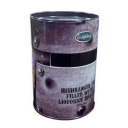

In [ ]:
### trash can hunting
x_data = np.load("/content/drive/My Drive/capstone_project/image_data/data_x.npy", allow_pickle = True)

from PIL import Image
trash_im = x_data[10]

im = Image.fromarray(trash_im)
im

In [ ]:
print(acc_list)
print(prec_list)
print(rec_list)
print(f1_list)
print(counts)

[0.998109640831758, 0.9678638941398866, 0.9149338374291115, 0.8412098298676749, 0.8393194706994329, 0.7712665406427222]
[1.0, 1.0, 0.71875, 1.0, 0.6666666666666666, 0.4482758620689655]
[0.9857142857142858, 0.83, 0.3898305084745763, 0.16, 0.3, 0.91]
[0.9928057553956835, 0.9071038251366119, 0.5054945054945055, 0.2758620689655173, 0.41379310344827586, 0.6006600660066007]
[70, 100, 59, 100, 100, 100]


In [ ]:
llava_by_nn[llava_by_nn['true_class']=='1'][50:]

,Unnamed: 0,output,neighbor,distance,final_selected_class,id,target,true_class
250,250,['Aluminum can'],aluminum food can,0.680598,1,50,aluminum_can,1
255,255,['Aluminum can'],aluminum food can,0.680598,1,51,aluminum_can,1
260,260,['Aluminum can'],aluminum food can,0.680598,1,52,aluminum_can,1
265,265,['Aluminum can'],aluminum food can,0.680598,1,53,aluminum_can,1
270,270,['Aluminum can'],aluminum food can,0.680598,1,54,aluminum_can,1
275,275,['Aluminum can'],aluminum food can,0.680598,1,55,aluminum_can,1
280,280,['Aluminum can'],aluminum food can,0.680598,1,56,aluminum_can,1
285,285,['Aluminum can'],aluminum food can,0.680598,1,57,aluminum_can,1
290,290,['Aluminum can'],aluminum food can,0.680598,1,58,aluminum_can,1
295,295,['Aluminum can'],aluminum food can,0.680598,1,59,aluminum_can,1


In [ ]:
np.multiply([[1, 2, 3]], [1,2, 1])

array([[1, 4, 3]])

In [ ]:
 llava_by_nn

,Unnamed: 0,output,neighbor,distance,final_selected_class,id,target,true_class
0,0,['Aluminum can'],aluminum food can,0.680598,1,0,aluminum_can,1
5,5,['Aluminum can'],aluminum food can,0.680598,1,1,aluminum_can,1
10,10,['Aluminum can'],aluminum food can,0.680598,1,2,aluminum_can,1
15,15,['Aluminum can'],aluminum food can,0.680598,1,3,aluminum_can,1
20,20,['Aluminum can'],aluminum food can,0.680598,1,4,aluminum_can,1
...,...,...,...,...,...,...,...,...
2620,2620,['Plastic bottle'],plastic bottle,0.325713,6,524,glass_bottle,5
2625,2625,['Plastic bottle'],plastic bottle,0.325713,6,525,glass_bottle,5
2630,2630,['Plastic bottle'],plastic bottle,0.325713,6,526,glass_bottle,5
2635,2635,['Alcohol bottle'],alcohol bottle,0.350173,5,527,glass_bottle,5


In [ ]:
llava_output_df

,Unnamed: 0,output,neighbor,distance,final_selected_class,id
0,0,['Aluminum can'],aluminum food can,0.680598,1,0
1,1,['Aluminum can'],steel can,0.876745,1,0
2,2,['Aluminum can'],tin can,0.983194,1,0
3,3,['Aluminum can'],alcohol bottle,1.079583,1,0
4,4,['Aluminum can'],plastic bottle,1.080726,1,0
...,...,...,...,...,...,...
2640,2640,['Beer bottle'],beer bottle,0.321728,5,528
2641,2641,['Beer bottle'],alcohol bottle,0.599593,5,528
2642,2642,['Beer bottle'],glass bottle,0.704752,5,528
2643,2643,['Beer bottle'],water bottle,0.786373,5,528


In [ ]:
word_list = ["aluminum food can",
              "tin can",
              "steel can",
              "canned food container",
              "canned food can",
              "soda can",
              "beverage can",
              "soft drink can",
              "pepsi can",
              "coca cola can",
              "paper cup",
              "hot beverage cup",
              "coffee cup",
              "lined paper cup",
              "disposable coffee cup",
              "white paper cup",
              "cardboard",
             "cardboard box",
              "box",
              "packing box",
              "cereal box",
              "glass bottle",
              "glass drink container",
              "water bottle",
              "disposable water bottle",
              "plastic bottle",
              "soda bottle"]